[*********************100%%**********************]  1 of 1 completed

Using device: cuda
Processing BTC-USD...


Epoch [10/100], Loss: 0.0361
Epoch [20/100], Loss: 0.0139
Epoch [30/100], Loss: 0.0079
Epoch [40/100], Loss: 0.0064
Epoch [50/100], Loss: 0.0055
Epoch [60/100], Loss: 0.0047
Epoch [70/100], Loss: 0.0039
Epoch [80/100], Loss: 0.0030
Epoch [90/100], Loss: 0.0024
Epoch [100/100], Loss: 0.0021


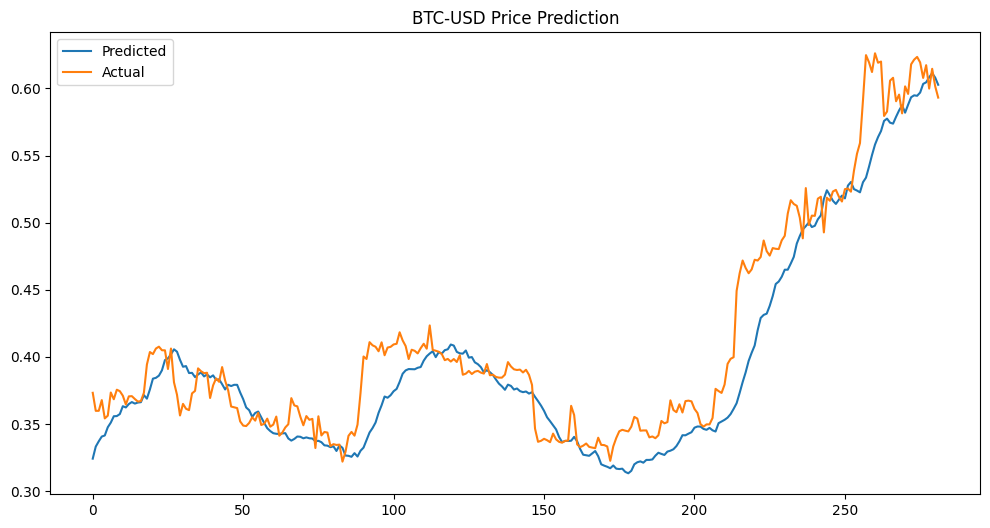

Processing ETH-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0234
Epoch [20/100], Loss: 0.0116
Epoch [30/100], Loss: 0.0074
Epoch [40/100], Loss: 0.0059
Epoch [50/100], Loss: 0.0053
Epoch [60/100], Loss: 0.0046
Epoch [70/100], Loss: 0.0038
Epoch [80/100], Loss: 0.0032
Epoch [90/100], Loss: 0.0028
Epoch [100/100], Loss: 0.0025


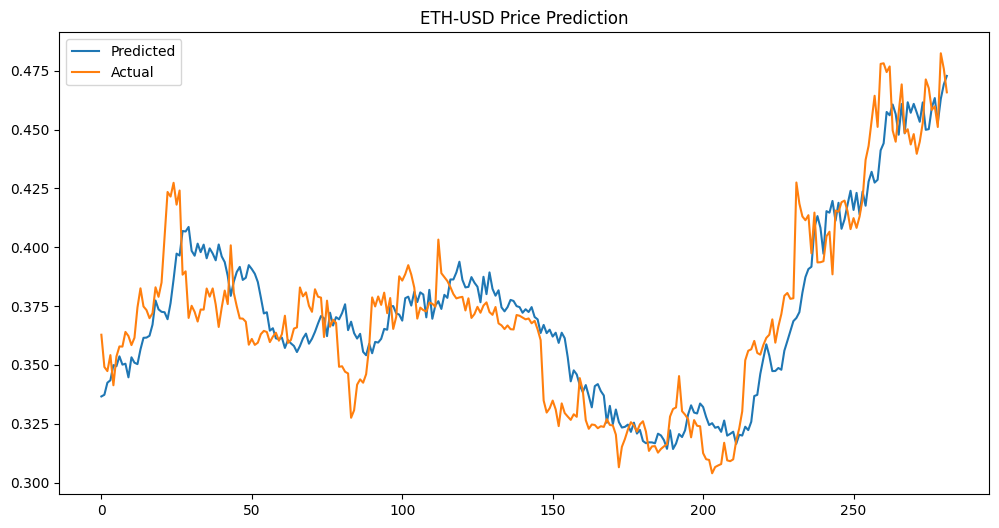

Processing BNB-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0316
Epoch [20/100], Loss: 0.0131
Epoch [30/100], Loss: 0.0065
Epoch [40/100], Loss: 0.0051
Epoch [50/100], Loss: 0.0035
Epoch [60/100], Loss: 0.0029
Epoch [70/100], Loss: 0.0025
Epoch [80/100], Loss: 0.0021
Epoch [90/100], Loss: 0.0018
Epoch [100/100], Loss: 0.0015


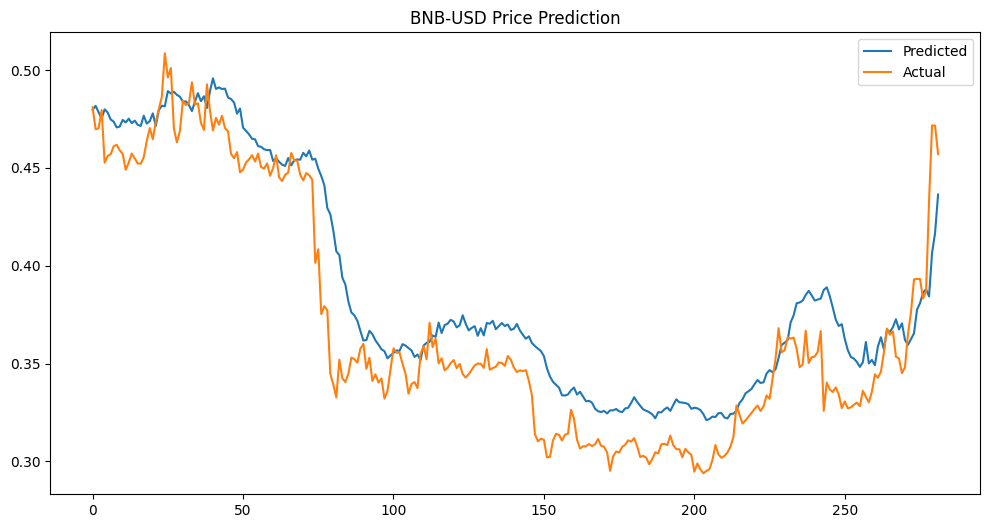

Processing ADA-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0172
Epoch [20/100], Loss: 0.0068
Epoch [30/100], Loss: 0.0038
Epoch [40/100], Loss: 0.0031
Epoch [50/100], Loss: 0.0021
Epoch [60/100], Loss: 0.0018
Epoch [70/100], Loss: 0.0015
Epoch [80/100], Loss: 0.0013
Epoch [90/100], Loss: 0.0012
Epoch [100/100], Loss: 0.0011


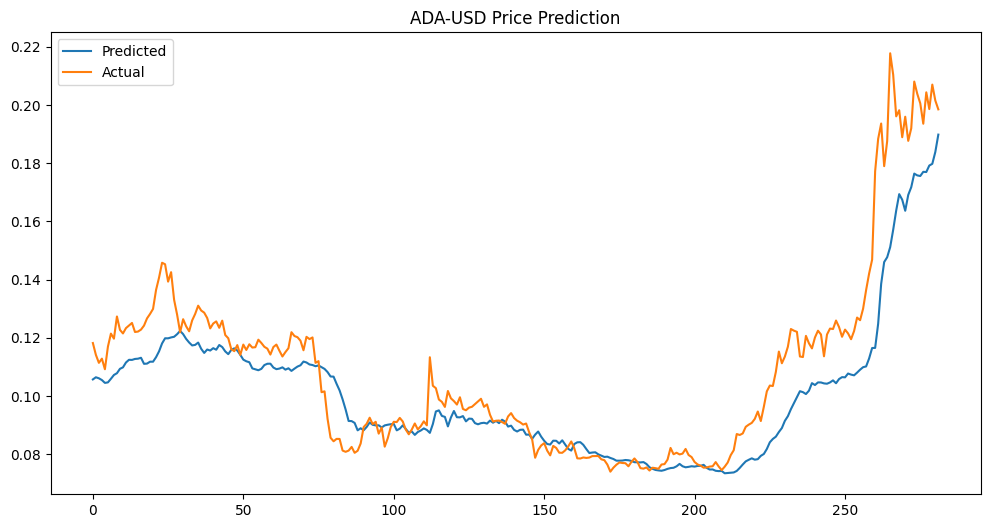

Processing SOL-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0189
Epoch [20/100], Loss: 0.0060
Epoch [30/100], Loss: 0.0033
Epoch [40/100], Loss: 0.0021
Epoch [50/100], Loss: 0.0017
Epoch [60/100], Loss: 0.0014
Epoch [70/100], Loss: 0.0011
Epoch [80/100], Loss: 0.0009
Epoch [90/100], Loss: 0.0008
Epoch [100/100], Loss: 0.0007


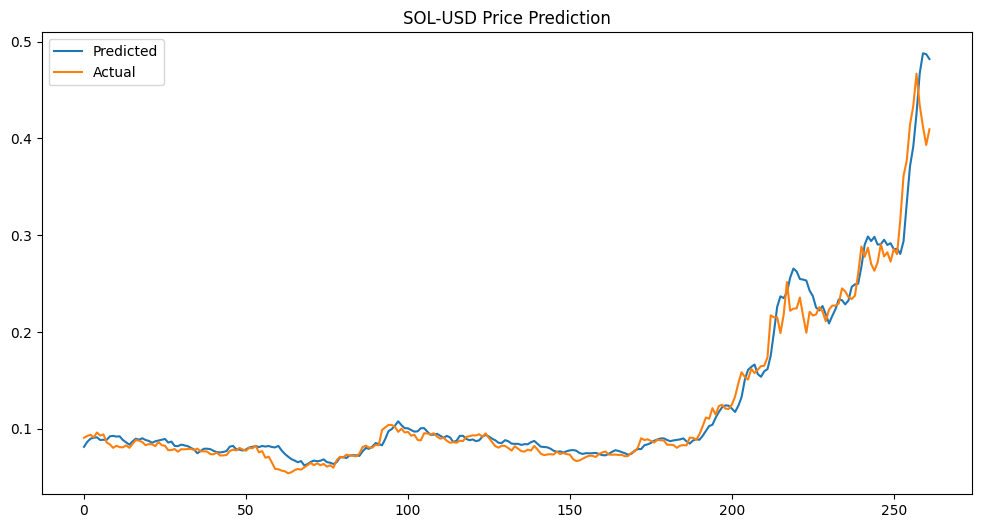

Processing XRP-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0230
Epoch [20/100], Loss: 0.0114
Epoch [30/100], Loss: 0.0057
Epoch [40/100], Loss: 0.0032
Epoch [50/100], Loss: 0.0027
Epoch [60/100], Loss: 0.0021
Epoch [70/100], Loss: 0.0018
Epoch [80/100], Loss: 0.0015
Epoch [90/100], Loss: 0.0013
Epoch [100/100], Loss: 0.0012


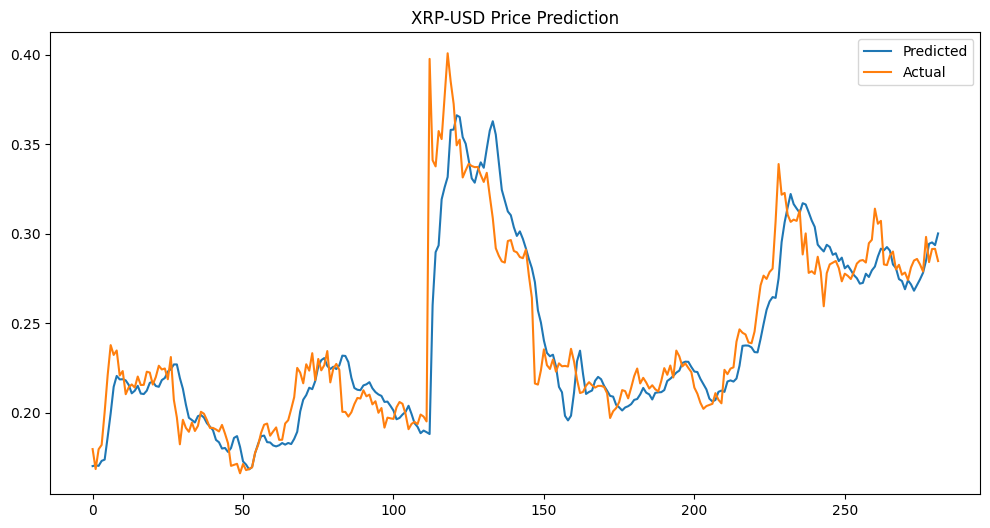

Processing DOT-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0189
Epoch [20/100], Loss: 0.0080
Epoch [30/100], Loss: 0.0059
Epoch [40/100], Loss: 0.0040
Epoch [50/100], Loss: 0.0032
Epoch [60/100], Loss: 0.0028
Epoch [70/100], Loss: 0.0024
Epoch [80/100], Loss: 0.0020
Epoch [90/100], Loss: 0.0018
Epoch [100/100], Loss: 0.0016


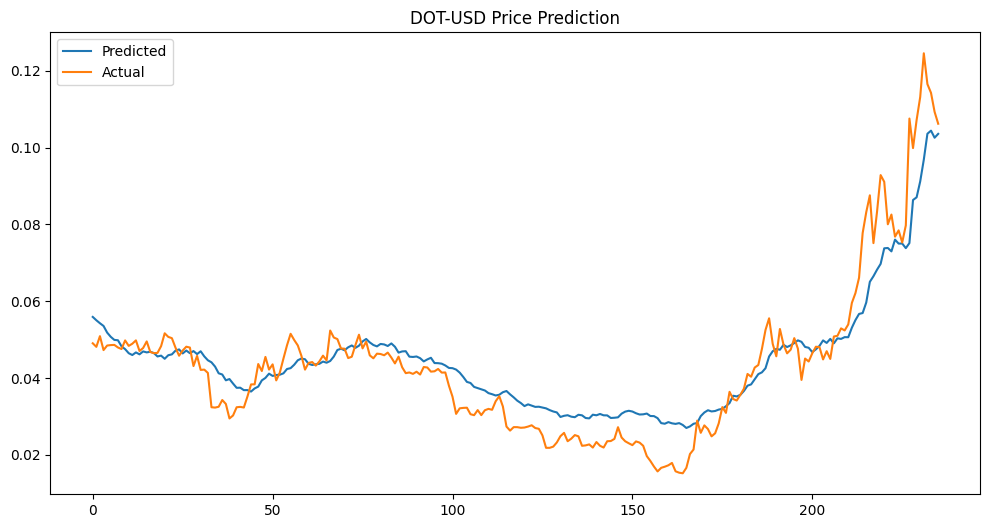

Processing DOGE-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0105
Epoch [20/100], Loss: 0.0025
Epoch [30/100], Loss: 0.0019
Epoch [40/100], Loss: 0.0013
Epoch [50/100], Loss: 0.0010
Epoch [60/100], Loss: 0.0007
Epoch [70/100], Loss: 0.0006
Epoch [80/100], Loss: 0.0005
Epoch [90/100], Loss: 0.0004
Epoch [100/100], Loss: 0.0004


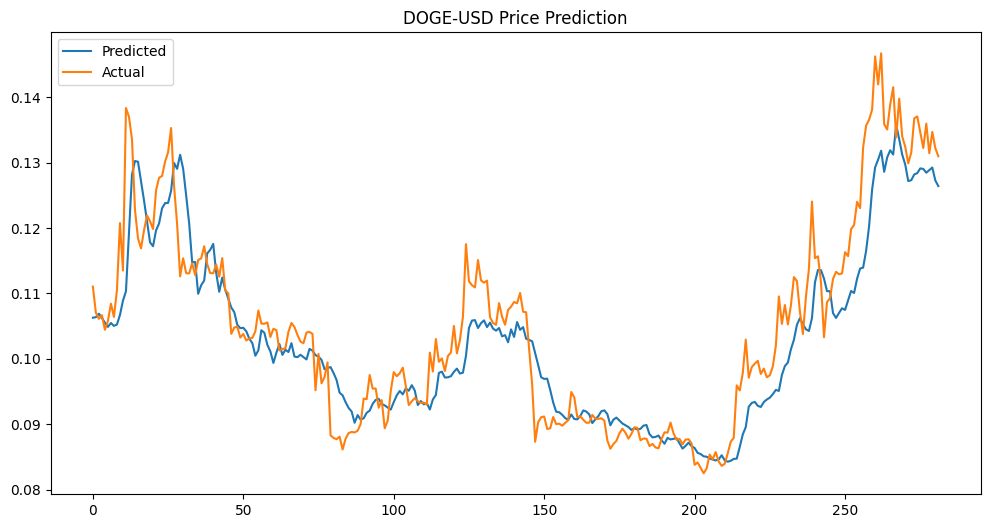

Processing AVAX-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0216
Epoch [20/100], Loss: 0.0102
Epoch [30/100], Loss: 0.0063
Epoch [40/100], Loss: 0.0044
Epoch [50/100], Loss: 0.0036
Epoch [60/100], Loss: 0.0031
Epoch [70/100], Loss: 0.0026
Epoch [80/100], Loss: 0.0022
Epoch [90/100], Loss: 0.0020
Epoch [100/100], Loss: 0.0018


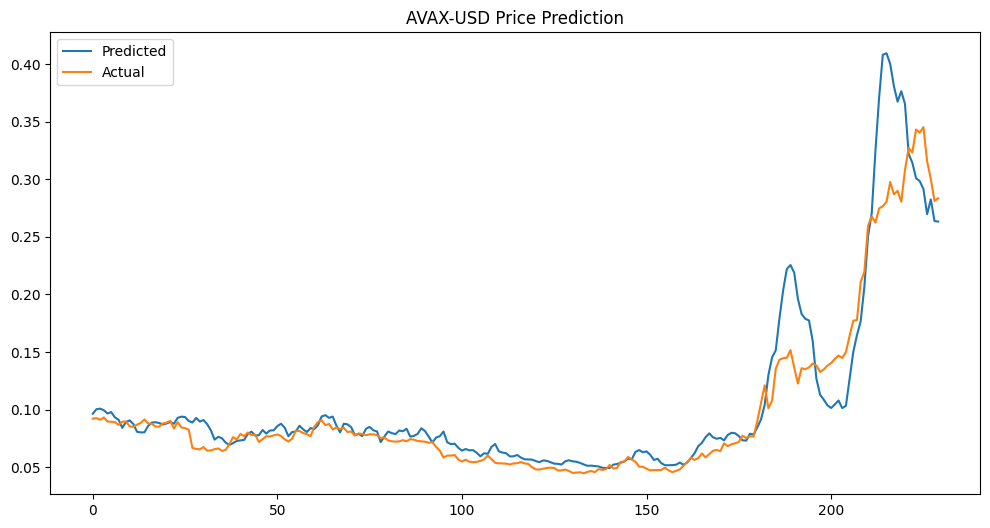

Processing LTC-USD...


[*********************100%%**********************]  1 of 1 completed


Epoch [10/100], Loss: 0.0208
Epoch [20/100], Loss: 0.0094
Epoch [30/100], Loss: 0.0062
Epoch [40/100], Loss: 0.0045
Epoch [50/100], Loss: 0.0033
Epoch [60/100], Loss: 0.0026
Epoch [70/100], Loss: 0.0022
Epoch [80/100], Loss: 0.0019
Epoch [90/100], Loss: 0.0016
Epoch [100/100], Loss: 0.0014


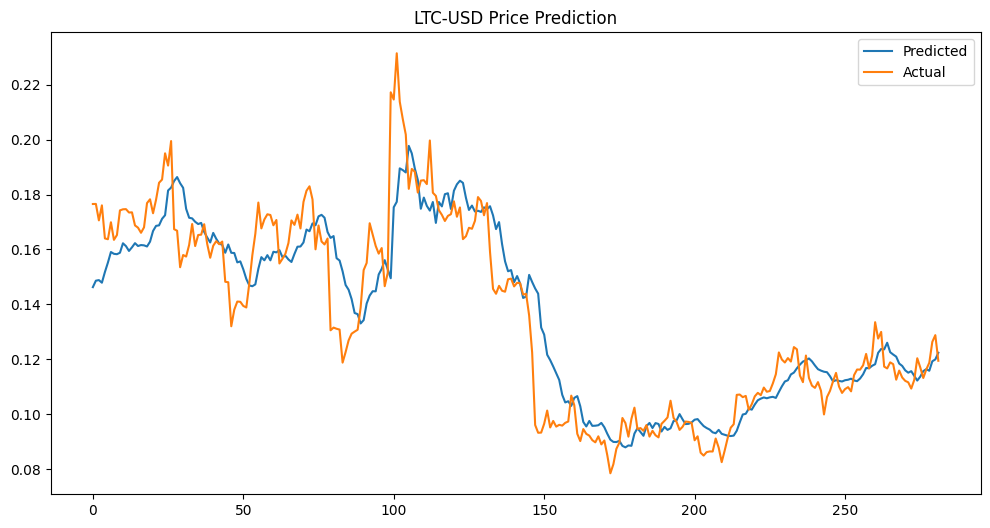

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from textblob import TextBlob

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the list of top 10 cryptocurrencies
top_10_coins = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'SOL-USD', 'XRP-USD', 'DOT-USD', 'DOGE-USD', 'AVAX-USD', 'LTC-USD']

# Function to fetch historical price data
def fetch_price_data(symbol, start_date='2020-01-01', end_date='2023-12-31'):
    df = yf.download(symbol, start=start_date, end=end_date, interval='1d')
    df['Sentiment'] = 0
    return df

# Function to fetch tweets and analyze sentiment
def fetch_tweets_and_analyze_sentiment(date):
    # Placeholder: Replace with actual method to fetch tweets from a free source
    tweets = [
        "This is great!",
        "Prices are falling.",
        "It's a good time to invest.",
    ]
    
    # Analyze sentiment using TextBlob
    sentiments = [TextBlob(tweet).sentiment.polarity for tweet in tweets]
    average_sentiment = np.mean(sentiments) if sentiments else 0
    return average_sentiment

# Function to update sentiment data in price data
def update_sentiment_data(df):
    sentiments = []
    for date in df.index:
        daily_sentiment = fetch_tweets_and_analyze_sentiment(date)
        sentiments.append(daily_sentiment)
    df['Sentiment'] = sentiments
    return df

# Preprocess data
def preprocess_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[['Close', 'Volume', 'Sentiment']])
    return scaled_data, scaler

# Define the Q-Network
class QNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize environment and parameters
def initialize_environment(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length][0])  # Use the closing price as target
    return np.array(X), np.array(y)

# Train the model
def train_model(X_train, y_train, model, criterion, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        inputs = torch.tensor(X_train, dtype=torch.float32).to(device)
        targets = torch.tensor(y_train, dtype=torch.float32).to(device).unsqueeze(1)  # Make targets 2D
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Main function to run the training process for multiple cryptocurrencies
def main():
    start_date = '2020-01-01'
    end_date = '2023-12-31'
    seq_length = 50
    num_epochs = 100
    
    for coin in top_10_coins:
        print(f"Processing {coin}...")
        
        # Fetch and prepare data
        price_data = fetch_price_data(coin, start_date, end_date)
        sentiment_data = update_sentiment_data(price_data)
        processed_data, scaler = preprocess_data(sentiment_data)
        
        # Initialize environment
        X, y = initialize_environment(processed_data, seq_length)
        X_train, X_test = X[:int(len(X) * 0.8)], X[int(len(X) * 0.8):]
        y_train, y_test = y[:int(len(y) * 0.8)], y[int(len(y) * 0.8):]
        
        # Define model, criterion, and optimizer
        input_dim = X_train.shape[1] * X_train.shape[2]
        model = QNetwork(input_dim=input_dim, output_dim=1).to(device)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        # Reshape X_train and X_test to match input dimensions
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)
        
        # Train model
        train_model(X_train, y_train, model, criterion, optimizer, num_epochs=num_epochs)
        
        # Evaluate model
        model.eval()
        with torch.no_grad():
            inputs = torch.tensor(X_test, dtype=torch.float32).to(device)
            predictions = model(inputs).cpu().numpy()
        
        # Plot results
        plt.figure(figsize=(12, 6))
        plt.plot(predictions, label='Predicted')
        plt.plot(y_test, label='Actual')
        plt.title(f'{coin} Price Prediction')
        plt.legend()
        plt.show()

# Run the main function
if __name__ == '__main__':
    main()
